In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('D:\BITS PILANI\Data Mining\Lab\Python\Lab 3 - KNN\spambase_data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
X = df[df.columns[:-1]]
Y = df[len(df.columns)-1]

<h1>Q1</h1>

In [4]:
X1 = X.copy()
for column in X.columns:
    X1[column] = (X[column] - X[column].min())/(X[column].max() - X[column].min())

X1.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.0,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.0,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.0,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.0,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995


In [5]:
knne = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knnm = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

In [6]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [7]:
knne.fit(X1_train, Y1_train)
knnm.fit(X1_train, Y1_train)

euclid_pred = knne.predict(X1_test)
manhat_pred = knnm.predict(X1_test)

In [8]:
print('Accuracy using Euclidean Method =', accuracy_score(Y1_test, euclid_pred))
print('Accuracy using Manhattan Method =', accuracy_score(Y1_test, manhat_pred))

Accuracy using Euclidean Method = 0.7937024972855592
Accuracy using Manhattan Method = 0.8284473398479913


<h1>Q2</h1>

In [9]:
print('Accuracy using Euclidean Method =', accuracy_score(Y1_test, euclid_pred))
print('Accuracy using Manhattan Method =', accuracy_score(Y1_test, manhat_pred))
print('\nAccuracy of Model using MANHATTAN Method gives greater accuracy')

Accuracy using Euclidean Method = 0.7937024972855592
Accuracy using Manhattan Method = 0.8284473398479913

Accuracy of Model using MANHATTAN Method gives greater accuracy


<h1>Q3</h1>

In [10]:
rote = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

rote.fit(X1_train, Y1_train)
rote_pred = rote.predict(X1_test)

print('Accuracy of Rote Learner =', accuracy_score(Y1_test, rote_pred))

Accuracy of Rote Learner = 0.8306188925081434


<h1>Q4</h1>

In [11]:
from sklearn.model_selection import cross_val_score

accuracy = []

for i in range(1,21):
    q4 = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    score = cross_val_score(q4, X, Y, scoring='accuracy', cv=5) 
    accuracy.append(score.mean())


In [12]:
acclist = pd.DataFrame(accuracy, index=range(1,21), columns=['accuracy'])
acclist

,accuracy
1,0.777007
2,0.764835
3,0.776354
4,0.767444
5,0.772446
6,0.760059
7,0.768752
8,0.759624
9,0.759842
10,0.759842


<h1>Q5</h1>

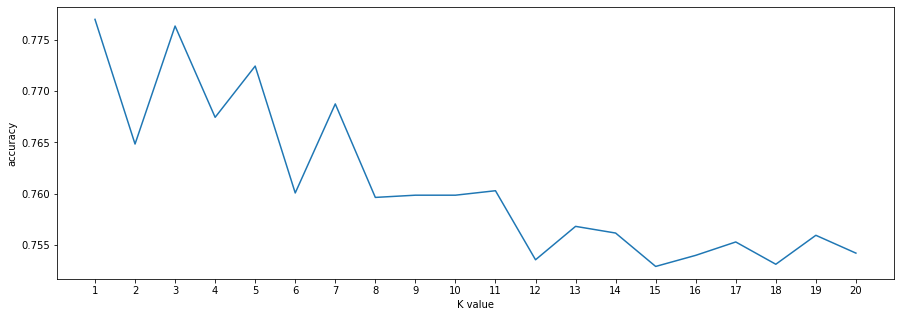

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(accuracy)
plt.xticks(ticks=range(0,20), labels=range(1,21))
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.show()

<h1>Q6</h1>

In [14]:
#from sklearn.model_selection import cross_val_score

accuracy6 = []

for k in range(1,21):
    q6 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores = cross_val_score(q6, X, Y, scoring='accuracy', cv=5) 
    accuracy6.append(scores.mean())


    accuracy
1   0.805043
2   0.791787
3   0.797435
4   0.796352
5   0.796786
6   0.792441
7   0.797005
8   0.796136
9   0.802004
10  0.795051
11  0.797659
12  0.791356
13  0.792660
14  0.792661
15  0.790053
16  0.788096
17  0.790702
18  0.786573
19  0.792659
20  0.788094


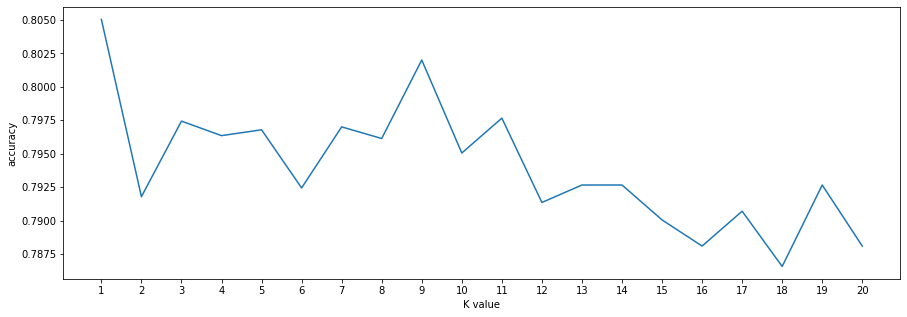

In [15]:
acclist6 = pd.DataFrame(accuracy6, index=range(1,21), columns=['accuracy'])
print(acclist6)

#import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(accuracy6)
plt.xticks(ticks=range(0,20), labels=range(1,21))
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.show()

<h1>Q7</h1>

In [16]:
#from sklearn.model_selection import cross_val_score

accuracy7 = []

for j in range(1,21):
    knn_weighted = KNeighborsClassifier(n_neighbors=j, weights='distance', metric='manhattan')
    score7 = cross_val_score(knn_weighted, X, Y, scoring='accuracy', cv=5) 
    accuracy7.append(score7.mean())



    accuracy
1   0.805043
2   0.805477
3   0.808955
4   0.813303
5   0.812652
6   0.813521
7   0.814610
8   0.812653
9   0.818522
10  0.814393
11  0.818958
12  0.814828
13  0.817871
14  0.816351
15  0.816568
16  0.815047
17  0.817000
18  0.813959
19  0.815481
20  0.814830


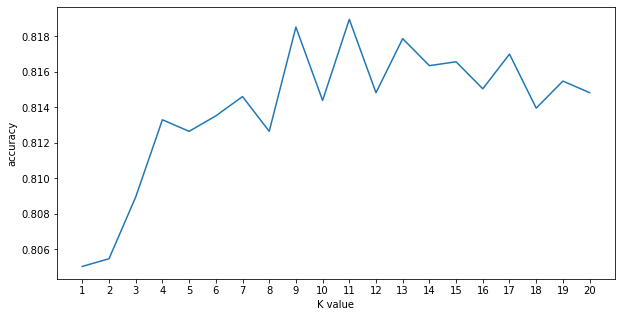

In [17]:
acclist7 = pd.DataFrame(accuracy7, index=range(1,21), columns=['accuracy'])
print(acclist7)

#import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(accuracy7)
plt.xticks(ticks=range(0,20), labels=range(1,21))
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.show()


<h1>Q8</h1>

In [18]:
acclist7 = pd.DataFrame(accuracy7, index=range(1,21), columns=['accuracy'])
acclist7

,accuracy
1,0.805043
2,0.805477
3,0.808955
4,0.813303
5,0.812652
6,0.813521
7,0.814610
8,0.812653
9,0.818522
10,0.814393


In [19]:
maximum = max(acclist7['accuracy'])
maxindex = accuracy7.index(maximum)
print('Maximum accuracy obtained =', maximum, 'for K value =', maxindex+1)

Maximum accuracy obtained = 0.8189581267997923 for K value = 11
